# QTW - Final - Post-EDA

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline 

## Load Data

In [5]:
data = pd.read_csv('final_project_mod.csv')

In [6]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [7]:
#data.dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0           159974 non-null float64
x1           159975 non-null float64
x2           159962 non-null float64
x3           159963 non-null float64
x4           159974 non-null float64
x5           159963 non-null float64
x6           159974 non-null float64
x7           159973 non-null float64
x8           159979 non-null float64
x9           159970 non-null float64
x10          159957 non-null float64
x11          159970 non-null float64
x12          159964 non-null float64
x13          159969 non-null float64
x14          159966 non-null float64
x15          159965 non-null float64
x16          159974 non-null float64
x17          159973 non-null float64
x18          159960 non-null float64
x19          159965 non-null float64
x20          159962 non-null float64
x21          159971 non-null float64
x22          159973 non-null float64
x23          159953 non-null float64
C

In [8]:
data.isnull().sum()

x0           26
x1           25
x2           38
x3           37
x4           26
x5           37
x6           26
x7           27
x8           21
x9           30
x10          43
x11          30
x12          36
x13          31
x14          34
x15          35
x16          26
x17          27
x18          40
x19          35
x20          38
x21          29
x22          27
x23          47
Continent    28
x25          22
x26          36
x27          30
x28          35
Month        30
DayOfWeek    30
x31          39
x32          31
x33          41
x34          41
x35          30
x36          27
Money        23
x38          31
x39          23
x40          36
x41          40
x42          26
x43          37
x44          40
x45          29
x46          31
x47          37
x48          32
x49          32
y             0
dtype: int64

In [56]:
#define X

x = data.drop(['y'], axis = 1)

#define y

y = data['y']


x1 = pd.get_dummies(x,prefix = ['Continent', 'Month', 'DayOfWeek'])

In [59]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159912 entries, 0 to 159999
Data columns (total 67 columns):
x0                   159912 non-null float64
x1                   159912 non-null float64
x2                   159912 non-null float64
x3                   159912 non-null float64
x4                   159912 non-null float64
x5                   159912 non-null float64
x6                   159912 non-null float64
x7                   159912 non-null float64
x8                   159912 non-null float64
x9                   159912 non-null float64
x10                  159912 non-null float64
x11                  159912 non-null float64
x12                  159912 non-null float64
x13                  159912 non-null float64
x14                  159912 non-null float64
x15                  159912 non-null float64
x16                  159912 non-null float64
x17                  159912 non-null float64
x18                  159912 non-null float64
x19                  159912 non-nu

# Naive Bayes:  Gaussian

### assuming a normal distribution for the float64 datatypes given the earlier histogram plots

In [60]:
model = GaussianNB()

model.fit(x1,y)

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=102)

In [61]:
y_pred = model.predict(x_test)

In [62]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74     19301
           1       0.61      0.63      0.62     12682

   micro avg       0.69      0.69      0.69     31983
   macro avg       0.68      0.68      0.68     31983
weighted avg       0.70      0.69      0.70     31983

[[14257  5044]
 [ 4719  7963]]
accuracy is 0.6947440827939843


# MultinomialNB

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [77]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(scaled_train_df,y)

x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=102)

In [78]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55     19301
           1       0.47      0.78      0.59     12682

   micro avg       0.57      0.57      0.57     31983
   macro avg       0.61      0.61      0.57     31983
weighted avg       0.64      0.57      0.56     31983

[[ 8298 11003]
 [ 2769  9913]]
accuracy is 0.5693962417534315


# Bernoulli

In [79]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train, y_train)
 
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=102)
    
y_pred = model.predict(x_test)

In [80]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.00      0.00     19301
           1       0.40      1.00      0.57     12682

   micro avg       0.40      0.40      0.40     31983
   macro avg       0.57      0.50      0.28     31983
weighted avg       0.61      0.40      0.23     31983

[[   12 19289]
 [    4 12678]]
accuracy is 0.3967732858080855


# Complement Naive Bayes

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [82]:
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=102)

In [83]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [84]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55     19301
           1       0.47      0.78      0.59     12682

   micro avg       0.57      0.57      0.57     31983
   macro avg       0.61      0.61      0.57     31983
weighted avg       0.64      0.57      0.56     31983

[[ 8298 11003]
 [ 2769  9913]]
accuracy is 0.5693962417534315


In [94]:
from sklearn.metrics import accuracy_score, log_loss
models = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [95]:
import seaborn as sns

GaussianNB
****Results****
Accuracy: 69.5151%
MultinomialNB
****Results****
Accuracy: 60.3477%
BernoulliNB
****Results****
Accuracy: 60.3446%
ComplementNB
****Results****
Accuracy: 56.9396%


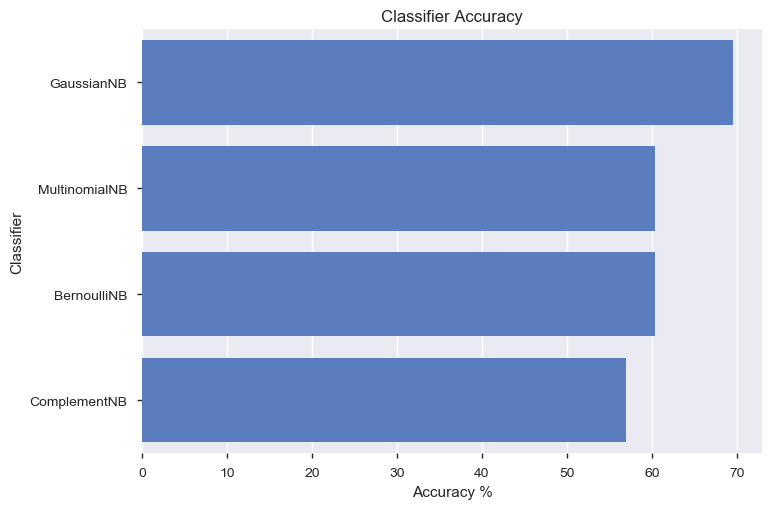

In [96]:
for clf in models:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 'Log Loss']], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

# Random Forest

In [98]:
data = pd.get_dummies(data)

In [99]:
print(data.shape)

(159912, 68)


In [100]:
import numpy as np

labels = np.array(data['y'])

data = data.drop('y', axis = 1)

data_list = list(data.columns)

data = np.array(data)


In [101]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=102)

In [116]:
# The baseline predictions are the historical averages
baseline_preds = x_test[:, data_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - y_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


ValueError: 'average' is not in list

In [114]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

In [115]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.17 degrees.


In [117]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [118]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

ModuleNotFoundError: No module named 'pydot'